## FIFA Women's World Cup 2015
FIFA Women's World Cup took place in Canada over the course of summer. I came across this API for it, which host the data in JSON (it also hosted the Men's World Cup 2014 data at one point, but I can no longer find it)
I will be using pandas to matplotlib to attempt to understand the data.

You can get the data here 
http://worldcup.sfg.io

https://github.com/estiens/world_cup_json

To read about the background of the original project
http://softwareforgood.com/soccer-good/

In [15]:
import urllib2
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url = "http://worldcup.sfg.io/matches"
data = urllib2.urlopen(url).read()


In [16]:
match = pd.DataFrame((pd.json.loads(data)))

In [17]:
match.head()

,away_team,away_team_events,datetime,home_team,home_team_events,location,match_number,status,winner,winner_code
0,"{u'country': u'China', u'code': u'CHN', u'goal...","[{u'type_of_event': u'substitution-out', u'pla...",2015-06-06T15:00:00.000-05:00,"{u'country': u'Canada', u'code': u'CAN', u'goa...","[{u'type_of_event': u'yellow-card', u'player':...",Commonwealth Stadium,1,completed,Canada,CAN
1,"{u'country': u'Netherlands', u'code': u'NED', ...","[{u'type_of_event': u'yellow-card', u'player':...",2015-06-06T18:00:00.000-05:00,"{u'country': u'New Zealand', u'code': u'NZL', ...","[{u'type_of_event': u'substitution-out', u'pla...",Commonwealth Stadium,2,completed,Netherlands,NED
2,"{u'country': u'Ivory Coast', u'code': u'CIV', ...","[{u'type_of_event': u'yellow-card', u'player':...",2015-06-07T15:00:00.000-05:00,"{u'country': u'Germany', u'code': u'GER', u'go...","[{u'type_of_event': u'goal', u'player': u'Sasi...",Lansdowne Stadium,3,completed,Germany,GER
3,"{u'country': u'Thailand', u'code': u'THA', u'g...","[{u'type_of_event': u'yellow-card', u'player':...",2015-06-07T12:00:00.000-05:00,"{u'country': u'Norway', u'code': u'NOR', u'goa...","[{u'type_of_event': u'goal', u'player': u'Rønn...",Lansdowne Stadium,4,completed,Norway,NOR
4,"{u'country': u'Switzerland', u'code': u'SUI', ...","[{u'type_of_event': u'yellow-card', u'player':...",2015-06-08T18:00:00.000-05:00,"{u'country': u'Japan', u'code': u'JPN', u'goal...","[{u'type_of_event': u'goal-penalty', u'player'...",BC Place Stadium,5,completed,Japan,JPN


This data frame will need some cleaning. Lets change the team names into actual country team names

In [18]:
match['away_team'] = match['away_team'].map(lambda x : x['country'])

In [19]:
match['home_team'] = match['home_team'].map(lambda x : x['country'])

In [20]:
match.head()

,away_team,away_team_events,datetime,home_team,home_team_events,location,match_number,status,winner,winner_code
0,China,"[{u'type_of_event': u'substitution-out', u'pla...",2015-06-06T15:00:00.000-05:00,Canada,"[{u'type_of_event': u'yellow-card', u'player':...",Commonwealth Stadium,1,completed,Canada,CAN
1,Netherlands,"[{u'type_of_event': u'yellow-card', u'player':...",2015-06-06T18:00:00.000-05:00,New Zealand,"[{u'type_of_event': u'substitution-out', u'pla...",Commonwealth Stadium,2,completed,Netherlands,NED
2,Ivory Coast,"[{u'type_of_event': u'yellow-card', u'player':...",2015-06-07T15:00:00.000-05:00,Germany,"[{u'type_of_event': u'goal', u'player': u'Sasi...",Lansdowne Stadium,3,completed,Germany,GER
3,Thailand,"[{u'type_of_event': u'yellow-card', u'player':...",2015-06-07T12:00:00.000-05:00,Norway,"[{u'type_of_event': u'goal', u'player': u'Rønn...",Lansdowne Stadium,4,completed,Norway,NOR
4,Switzerland,"[{u'type_of_event': u'yellow-card', u'player':...",2015-06-08T18:00:00.000-05:00,Japan,"[{u'type_of_event': u'goal-penalty', u'player'...",BC Place Stadium,5,completed,Japan,JPN


Next lets parse the datetime column into dates and times of the event.

In [21]:
match['date'] = pd.DatetimeIndex(match['datetime']).date
match['time'] = pd.DatetimeIndex(match['datetime']).time

In [22]:
match.head()

,away_team,away_team_events,datetime,home_team,home_team_events,location,match_number,status,winner,winner_code,date,time
0,China,"[{u'type_of_event': u'substitution-out', u'pla...",2015-06-06T15:00:00.000-05:00,Canada,"[{u'type_of_event': u'yellow-card', u'player':...",Commonwealth Stadium,1,completed,Canada,CAN,2015-06-06,20:00:00
1,Netherlands,"[{u'type_of_event': u'yellow-card', u'player':...",2015-06-06T18:00:00.000-05:00,New Zealand,"[{u'type_of_event': u'substitution-out', u'pla...",Commonwealth Stadium,2,completed,Netherlands,NED,2015-06-06,23:00:00
2,Ivory Coast,"[{u'type_of_event': u'yellow-card', u'player':...",2015-06-07T15:00:00.000-05:00,Germany,"[{u'type_of_event': u'goal', u'player': u'Sasi...",Lansdowne Stadium,3,completed,Germany,GER,2015-06-07,20:00:00
3,Thailand,"[{u'type_of_event': u'yellow-card', u'player':...",2015-06-07T12:00:00.000-05:00,Norway,"[{u'type_of_event': u'goal', u'player': u'Rønn...",Lansdowne Stadium,4,completed,Norway,NOR,2015-06-07,17:00:00
4,Switzerland,"[{u'type_of_event': u'yellow-card', u'player':...",2015-06-08T18:00:00.000-05:00,Japan,"[{u'type_of_event': u'goal-penalty', u'player'...",BC Place Stadium,5,completed,Japan,JPN,2015-06-08,23:00:00


The only thing we need to do is to fix the events for both teams.
To do this, lets first check out what's going on in each cell.

In [23]:
match['home_team_events'][1]

[{u'id': 15,
  u'player': u'Gregorius',
  u'time': u'67',
  u'type_of_event': u'substitution-out'},
 {u'id': 17,
  u'player': u'Pereira',
  u'time': u'67',
  u'type_of_event': u'substitution-in'},
 {u'id': 16,
  u'player': u'Bowen',
  u'time': u'72',
  u'type_of_event': u'substitution-out'},
 {u'id': 18,
  u'player': u'Hassett',
  u'time': u'72',
  u'type_of_event': u'substitution-in'}]

look like a list of six dicts. Lets look in more details, and focus on what kinds of events are there

In [24]:
possible_events = []
for i in range(len(match)): #loop the first 35 rows
    for j in match['home_team_events'][i]: # for each cell of the home_team_events
        possible_events.append(j['type_of_event'])#print the type of events
set(possible_events) # use the set() function to just see the unique values 

{u'goal',
 u'goal-own',
 u'goal-penalty',
 u'penalty-wrong',
 u'substitution-in',
 u'substitution-in halftime',
 u'substitution-out',
 u'substitution-out halftime',
 u'yellow-card',
 u'yellow-card-second'}

lets write a quick function to clean up the events

In [25]:
def event_clean(dict1):
    yc_count=0
    rc_count=0
    sub=0
    goal=0
    goal_p=0
    goal_o=0
    for i in dict1:
        for k,v in i.iteritems():
            if v=="yellow-card":
                yc_count+=1
            if v=='substitution-in' or v=='substitution-in halftime':
                #will ignore the halftime sub, just group with other substitution
                sub+=1
            if v == 'goal':
                goal+=1
            if v == 'goal-penalty':
                goal_p+=1
            if v== 'goal-own':
                goal_o+=1
            if v=="red-card":
                rc_count+=1
            

    return [yc_count,rc_count, sub, goal, goal_p, goal_o]

In [26]:
dict_col= {'yellow_card':0, 'red_card':1, 'sub':2, 'goal':3,'goal_pen':4, 'goal_own':5}


In [27]:
for k,v in dict_col.iteritems():
    
    match['away_team_'+k]= match.away_team_events.map(lambda x: event_clean(x)[v])
    match['home_team_'+k]= match.home_team_events.map(lambda x: event_clean(x)[v])

##Cool now we extracted all the events packed within the events dicts, and we had summarized the count of each event of each team in a match

In [28]:
match = match.set_index('match_number')

We probably don't need all the columns.

In [29]:
match.columns.values

array([u'away_team', u'away_team_events', u'datetime', u'home_team',
       u'home_team_events', u'location', u'status', u'winner',
       u'winner_code', 'date', 'time', 'away_team_sub', 'home_team_sub',
       'away_team_red_card', 'home_team_red_card', 'away_team_goal_own',
       'home_team_goal_own', 'away_team_goal_pen', 'home_team_goal_pen',
       'away_team_yellow_card', 'home_team_yellow_card', 'away_team_goal',
       'home_team_goal'], dtype=object)

In [30]:
match = match[['date','time','location','home_team','away_team','winner','away_team_sub', 'home_team_sub',
       'away_team_red_card', 'home_team_red_card', 'away_team_goal_own',
       'home_team_goal_own', 'away_team_goal_pen', 'home_team_goal_pen',
       'away_team_yellow_card', 'home_team_yellow_card', 'away_team_goal',
       'home_team_goal','home_team_events','away_team_events']]


In [300]:
match #lets look at the nice cleaned data frame

,date,time,location,home_team,away_team,winner,away_team_sub,home_team_sub,away_team_red_card,home_team_red_card,away_team_goal_own,home_team_goal_own,away_team_goal_pen,home_team_goal_pen,away_team_yellow_card,home_team_yellow_card,away_team_goal,home_team_goal,home_team_events,away_team_events
match_number,,,,,,,,,,,,,,,,,,,,
1,2015-06-06,20:00:00,Commonwealth Stadium,Canada,China,Canada,3,3,0,0,0,0,0,1,0,1,0,0,"[{u'type_of_event': u'yellow-card', u'player':...","[{u'type_of_event': u'substitution-out', u'pla..."
2,2015-06-06,23:00:00,Commonwealth Stadium,New Zealand,Netherlands,Netherlands,3,2,0,0,0,0,0,0,2,0,1,0,"[{u'type_of_event': u'substitution-out', u'pla...","[{u'type_of_event': u'yellow-card', u'player':..."
3,2015-06-07,20:00:00,Lansdowne Stadium,Germany,Ivory Coast,Germany,3,3,0,0,0,0,0,0,6,0,0,10,"[{u'type_of_event': u'goal', u'player': u'Sasi...","[{u'type_of_event': u'yellow-card', u'player':..."
4,2015-06-07,17:00:00,Lansdowne Stadium,Norway,Thailand,Norway,2,3,0,0,0,0,0,0,2,0,0,4,"[{u'type_of_event': u'goal', u'player': u'Rønn...","[{u'type_of_event': u'yellow-card', u'player':..."
5,2015-06-08,23:00:00,BC Place Stadium,Japan,Switzerland,Japan,2,3,0,0,0,0,0,1,3,0,0,0,"[{u'type_of_event': u'goal-penalty', u'player'...","[{u'type_of_event': u'yellow-card', u'player':..."
6,2015-06-08,20:00:00,BC Place Stadium,Cameroon,Ecuador,Cameroon,3,3,1,0,0,0,0,3,3,1,0,3,"[{u'type_of_event': u'goal', u'player': u'Ngon...","[{u'type_of_event': u'yellow-card', u'player':..."
7,2015-06-08,22:30:00,Winnipeg Stadium,United States,Australia,United States,3,3,0,0,0,0,0,0,0,2,1,3,"[{u'type_of_event': u'goal', u'player': u'Rapi...","[{u'type_of_event': u'goal', u'player': u'De V..."
8,2015-06-08,19:00:00,Winnipeg Stadium,Sweden,Nigeria,Draw,0,3,0,0,1,0,0,0,0,0,3,2,"[{u'type_of_event': u'goal', u'player': u'Fisc...","[{u'type_of_event': u'goal-own', u'player': u'..."
9,2015-06-09,23:00:00,Olympic Stadium,Brazil,Korea Republic,Brazil,3,3,0,0,0,0,0,1,1,0,0,1,"[{u'type_of_event': u'goal', u'player': u'Form...","[{u'type_of_event': u'yellow-card', u'player':..."


## We have this data frame that only contain the summarized events count of each match. What if we would like to see the events of the matches?


In [31]:
def unpack_event(df, h_or_a):
    '''
    df : the data frame that contains the dicts of events to unpack (match data frame)
    h_or_a : flag of either home or away team events to unpack
    idea : to take the home team event, and take the home_team_events to generate a df, 
    which include all line items
    then add ['team'] col to indicate if it is home or away,
    and add['match_number'] to indicate match number
    '''
    unpacked_event_dfs=[]
    for i in range(len(df)):#loop the match df
        unpacked_event_df_by_match = pd.DataFrame.from_dict(df.loc[i+1,h_or_a]) 
        #look into a cell of the parent df, extract the dicts in that cell
        #and generate a event df
        if h_or_a=='home_team_events':
            unpacked_event_df_by_match['team']='home'
            #give the home or away as team
        if h_or_a=='away_team_events':
            unpacked_event_df_by_match['team']='away'
        
        unpacked_event_df_by_match['match']=i+1 # lets match up the match #
        unpacked_event_dfs.append(unpacked_event_df_by_match) 
        #this data frame will be appeneded into the list
    
    
    return pd.concat(unpacked_event_dfs)  
#concat the list that contain the dfs, and return the resulting df

In [32]:
unpacked_events = pd.concat([unpack_event(match, 'home_team_events'), unpack_event(match, 'away_team_events')])

In [33]:
unpacked_events = unpacked_events.set_index('id')

In [34]:
unpacked_events.tail(5)

,player,time,type_of_event,team,match
id,,,,,
840,Sugasawa,39,substitution-in,away,52
843,Ohno,60,substitution-out,away,52
844,Iwabuchi,60,substitution-in,away,52
849,Sawa,82,yellow-card,away,52
850,Iwabuchi,85,yellow-card,away,52


Now that we unpacked the events of each match, we can get rid of the events columns at match data frame

In [35]:
del match['home_team_events']

In [36]:
del match['away_team_events']

In [37]:
summarized = pd.merge(match.reset_index(), unpacked_events, how='outer', left_on = 'match_number',right_on='match')
del summarized['match']
summarized = summarized.set_index('match_number')
summarized


,date,time_x,location,home_team,away_team,winner,away_team_sub,home_team_sub,away_team_red_card,home_team_red_card,...,away_team_goal_pen,home_team_goal_pen,away_team_yellow_card,home_team_yellow_card,away_team_goal,home_team_goal,player,time_y,type_of_event,team
match_number,,,,,,,,,,,,,,,,,,,,,
1,2015-06-06,20:00:00,Commonwealth Stadium,Canada,China,Canada,3,3,0,0,...,0,1,0,1,0,0,Scott,22,yellow-card,home
1,2015-06-06,20:00:00,Commonwealth Stadium,Canada,China,Canada,3,3,0,0,...,0,1,0,1,0,0,Kyle,61,substitution-in,home
1,2015-06-06,20:00:00,Commonwealth Stadium,Canada,China,Canada,3,3,0,0,...,0,1,0,1,0,0,Filigno,61,substitution-out,home
1,2015-06-06,20:00:00,Commonwealth Stadium,Canada,China,Canada,3,3,0,0,...,0,1,0,1,0,0,Scott,71,substitution-out,home
1,2015-06-06,20:00:00,Commonwealth Stadium,Canada,China,Canada,3,3,0,0,...,0,1,0,1,0,0,Fleming,71,substitution-in,home
1,2015-06-06,20:00:00,Commonwealth Stadium,Canada,China,Canada,3,3,0,0,...,0,1,0,1,0,0,Tancredi,77,substitution-out,home
1,2015-06-06,20:00:00,Commonwealth Stadium,Canada,China,Canada,3,3,0,0,...,0,1,0,1,0,0,Leon,77,substitution-in,home
1,2015-06-06,20:00:00,Commonwealth Stadium,Canada,China,Canada,3,3,0,0,...,0,1,0,1,0,0,Sinclair,902,goal-penalty,home
1,2015-06-06,20:00:00,Commonwealth Stadium,Canada,China,Canada,3,3,0,0,...,0,1,0,1,0,0,Wang L S,42,substitution-out,away


now that we have three data frame, match, unpacked_events and summarized, we can answer some question

first thing first, who won?

In [38]:
match.tail(5)

,date,time,location,home_team,away_team,winner,away_team_sub,home_team_sub,away_team_red_card,home_team_red_card,away_team_goal_own,home_team_goal_own,away_team_goal_pen,home_team_goal_pen,away_team_yellow_card,home_team_yellow_card,away_team_goal,home_team_goal
match_number,,,,,,,,,,,,,,,,,,
48,2015-06-27,20:30:00,BC Place Stadium,England,Canada,England,3,3,0,0,0,0,0,0,1,1,1,2
49,2015-06-30,23:00:00,Olympic Stadium,United States,Germany,United States,1,3,0,0,0,0,0,1,2,2,0,1
50,2015-07-01,21:00:00,Commonwealth Stadium,Japan,England,Japan,3,1,0,0,1,0,1,1,1,1,0,0
51,2015-07-04,18:00:00,Commonwealth Stadium,Germany,England,England,3,3,0,0,0,0,1,0,3,0,0,0
52,2015-07-05,20:00:00,BC Place Stadium,United States,Japan,United States,3,3,0,0,0,1,0,0,2,0,1,5


##So USA beat Japan for first place, and England beat Germany for third place
###Next I wonder if the match is getting more physcial

In [39]:
total_card = (match['home_team_yellow_card']+ match['home_team_red_card']+ match['away_team_yellow_card']+ match['away_team_red_card'])

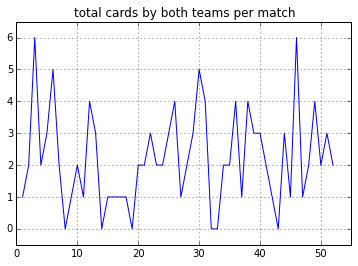

In [40]:
plt.plot(total_card.index, total_card.values)
plt.ylim(-0.5, 6.5)
plt.xlim(0,55)
plt.grid(1)
plt.title("total cards by both teams per match")

doesn't really reveal a pattern here. Lets look into it more by going into the rolling mean

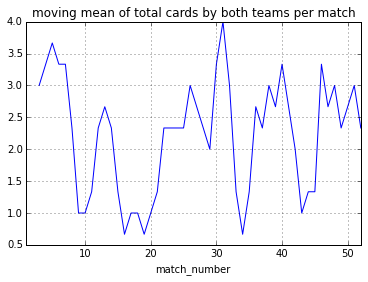

In [41]:
pd.rolling_mean(total_card, window = 3).plot()
plt.title('moving mean of total cards by both teams per match')

###so when I look at the chart of moving mean, the rise and drop at 29-31 and 31-34  correspond to the end of the group stage; I believe the teams in the groups are trying to get to next round so the matches were getting more physcial, and once the teams kind of know if they will make it to the next round, very little cards were issused.


### A similar of rise and fall, rise and fall can be observed, yet less obvious, for the quarter finals and semi-finals
Here is a pdf file for the schedule of thw World Cup 2015
http://resources.fifa.com/mm/document/tournament/competition/02/03/96/71/fwwc2015_matchschedule_16022015_en_neutral.pdf

In [42]:
lost_team_yc= []
for i in range(len(match)):
    if match.ix[i+1,'winner'] == match.ix[i+1,'home_team']:
        lost_team_yc.append(match.ix[i+1,'away_team_yellow_card']+ match.ix[i+1,'away_team_red_card'])
    else:
        lost_team_yc.append(match.ix[i+1,'home_team_yellow_card']+ match.ix[i+1,'home_team_red_card'])

In [43]:
match.head(5)

,date,time,location,home_team,away_team,winner,away_team_sub,home_team_sub,away_team_red_card,home_team_red_card,away_team_goal_own,home_team_goal_own,away_team_goal_pen,home_team_goal_pen,away_team_yellow_card,home_team_yellow_card,away_team_goal,home_team_goal
match_number,,,,,,,,,,,,,,,,,,
1,2015-06-06,20:00:00,Commonwealth Stadium,Canada,China,Canada,3,3,0,0,0,0,0,1,0,1,0,0
2,2015-06-06,23:00:00,Commonwealth Stadium,New Zealand,Netherlands,Netherlands,3,2,0,0,0,0,0,0,2,0,1,0
3,2015-06-07,20:00:00,Lansdowne Stadium,Germany,Ivory Coast,Germany,3,3,0,0,0,0,0,0,6,0,0,10
4,2015-06-07,17:00:00,Lansdowne Stadium,Norway,Thailand,Norway,2,3,0,0,0,0,0,0,2,0,0,4
5,2015-06-08,23:00:00,BC Place Stadium,Japan,Switzerland,Japan,2,3,0,0,0,0,0,1,3,0,0,0


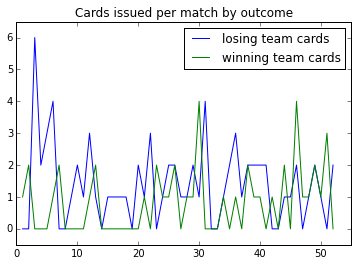

In [44]:
fig, ax = plt.subplots(1,1)
ax.plot(range(1,53), lost_team_yc, label = "losing team cards")
ax.plot(range(1,53), total_card.values - lost_team_yc, label = 'winning team cards')
ax.legend(loc=1)
plt.ylim(-0.5, 6.5)
plt.xlim(0,55)
plt.title('Cards issued per match by outcome')
plt.show()

###look like the losing teams get more cards in general, except towards the end of the tournaments. They are trying to do whatever it takes to win that match?

In [45]:
unpacked_events = unpacked_events.sort()

In [46]:
unpacked_events

,player,time,type_of_event,team,match
id,,,,,
1,Scott,22,yellow-card,home,1
2,Scott,71,substitution-out,home,1
3,Sinclair,902,goal-penalty,home,1
4,Tancredi,77,substitution-out,home,1
5,Filigno,61,substitution-out,home,1
6,Kyle,61,substitution-in,home,1
7,Fleming,71,substitution-in,home,1
8,Leon,77,substitution-in,home,1
9,Li Y,62,substitution-out,away,1


###lets check out the quickest goal 

In [47]:
unpacked_events[unpacked_events['type_of_event']=='goal'].groupby('match').time.min().order()

match
35      1
42     10
25     10
48     11
7      12
37     12
10     13
3      14
52     14
32     15
4      15
36     15
17     17
22     17
23     19
39     24
27     24
30     24
16     26
26     28
34     29
11     29
20     29
8      31
9      33
2      33
6      34
12     36
40      4
21     44
31     45
18    452
29      5
45     51
44     52
38     53
43     54
15      6
28      6
46     64
24     71
41     80
33     83
49     84
47     87
14    901
Name: time, dtype: object

### so at match # 35, there was a goal in the first minute. Nice because I don't think I ever watch an entire 90-minute match
#####But it look like there is something wrong. The time is not actually a number, but an object. Lets take a closer look

In [48]:
unpacked_events.time.unique()

array([u'22', u'71', u'902', u'77', u'61', u'62', u'87', u'42', u'67',
       u'72', u'84', u'81', u'32', u'33', u'64', u'90+2', u'75', u'15',
       u'63', u'69', u'29', u'34', u'46', u'68', u'59', u'51', u'90',
       u'73', u'35', u'3', u'14', u'31', u'17', u'85', u'79', u'40', u'70',
       u'38', u'36', u'66', u'86', u'58', u'21', u'50', u'53', u'57',
       u'60', u'12', u'43', u'44', u'45', u'45+2', u'27', u'54', u'56',
       u'83', u'74', u'904', u'78', u'80', u'28', u'90+3', u'65', u'76',
       u'13', u'18', u'26', u'55', u'82', u'88', u'52', u'901', u'90+1',
       u'6', u'4', u'45+3', u'90+7', u'89', u'24', u'452', u'47', u'49',
       u'19', u'23', u'903', u'25', u'10', u'41', u'5', u'39', u'1', u'9',
       u'37', u'90+4', u'8', u'48', u'91', u'101', u'11', u'92', u'108',
       u'112', u'16'], dtype=object)

In [49]:
# so they are unicode objects. Lets fix that.
def clean_minute(x):
    temp_str = str(x).replace('+','.')
    if temp_str >900: #make up minutes after the entire 90-min match
        return float(temp_str[0:2]) + float(temp_str[-1])
    else:
        return float(temp_str)
unpacked_events['time'] = unpacked_events.time.map(lambda x : clean_minute(x))

In [50]:
unpacked_events

,player,time,type_of_event,team,match
id,,,,,
1,Scott,24,yellow-card,home,1
2,Scott,72,substitution-out,home,1
3,Sinclair,92,goal-penalty,home,1
4,Tancredi,84,substitution-out,home,1
5,Filigno,62,substitution-out,home,1
6,Kyle,62,substitution-in,home,1
7,Fleming,72,substitution-in,home,1
8,Leon,84,substitution-in,home,1
9,Li Y,64,substitution-out,away,1


####Now I am wondering what the teams had done during the match.  But the team of home and away isn't really helpful.

In [51]:
unpacked_events.loc[1,'team']

'home'

In [52]:
home_team = match['home_team'].values
away_team = match['away_team'].values

In [53]:
away_team

array([u'China', u'Netherlands', u'Ivory Coast', u'Thailand',
       u'Switzerland', u'Ecuador', u'Australia', u'Nigeria',
       u'Korea Republic', u'Costa Rica', u'England', u'Mexico',
       u'New Zealand', u'Netherlands', u'Norway', u'Thailand', u'Cameroon',
       u'Ecuador', u'Sweden', u'Nigeria', u'Spain', u'Costa Rica',
       u'Colombia', u'Mexico', u'Canada', u'New Zealand', u'Germany',
       u'Norway', u'Japan', u'Cameroon', u'United States', u'Sweden',
       u'Brazil', u'Spain', u'France', u'Colombia', u'Cameroon',
       u'Colombia', u'Sweden', u'Korea Republic', u'Australia',
       u'Netherlands', u'England', u'Switzerland', u'United States',
       u'France', u'Japan', u'Canada', u'Germany', u'England', u'England',
       u'Japan'], dtype=object)

In [54]:
home_team[0]

u'Canada'

In [55]:
print home_team

[u'Canada' u'New Zealand' u'Germany' u'Norway' u'Japan' u'Cameroon'
 u'United States' u'Sweden' u'Brazil' u'Spain' u'France' u'Colombia'
 u'Canada' u'China' u'Germany' u'Ivory Coast' u'Japan' u'Switzerland'
 u'United States' u'Australia' u'Brazil' u'Korea Republic' u'France'
 u'England' u'Netherlands' u'China' u'Thailand' u'Ivory Coast' u'Ecuador'
 u'Switzerland' u'Nigeria' u'Australia' u'Costa Rica' u'Korea Republic'
 u'Mexico' u'England' u'China' u'United States' u'Germany' u'France'
 u'Brazil' u'Japan' u'Norway' u'Canada' u'China' u'Germany' u'Australia'
 u'England' u'United States' u'Japan' u'Germany' u'United States']


In [56]:
#Now I will attempt to fill the team name in
%time
for i in range(len(unpacked_events)):
    if unpacked_events.loc[i+1, 'team'] == 'away':
        unpacked_events.ix[i+1, 'team'] = away_team[unpacked_events.ix[i+1, 'match']-1]
    else:
        unpacked_events.ix[i+1, 'team']= home_team[unpacked_events.ix[i+1, 'match']-1]

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 5.01 µs


In [57]:
unpacked_events

,player,time,type_of_event,team,match
id,,,,,
1,Scott,24,yellow-card,Canada,1
2,Scott,72,substitution-out,Canada,1
3,Sinclair,92,goal-penalty,Canada,1
4,Tancredi,84,substitution-out,Canada,1
5,Filigno,62,substitution-out,Canada,1
6,Kyle,62,substitution-in,Canada,1
7,Fleming,72,substitution-in,Canada,1
8,Leon,84,substitution-in,Canada,1
9,Li Y,64,substitution-out,China,1


####I was worried that the operation may take too long.

In [58]:
unpacked_events.type_of_event.value_counts()

substitution-in              269
substitution-out             269
goal                         124
yellow-card                  113
substitution-out halftime     23
substitution-in halftime      23
goal-penalty                  18
goal-own                       6
penalty-wrong                  4
red-card                       2
yellow-card-second             1
dtype: int64

###let check out the events of each team

In [60]:
events_by_team = unpacked_events.groupby('team').type_of_event.value_counts()

In [64]:
events_by_team #a series of multi-level index

team                                    
Australia      substitution-in              13
               substitution-out             13
               goal                          5
Brazil         substitution-in              11
               substitution-out             11
               goal                          3
               yellow-card                   3
               goal-penalty                  1
Cameroon       substitution-out             10
               substitution-in              10
               yellow-card                   7
               goal                          6
               goal-penalty                  3
               substitution-in halftime      1
               substitution-out halftime     1
Canada         substitution-in              15
               substitution-out             15
               yellow-card                   6
               goal                          3
               goal-penalty                  1
China          subs

In [65]:
events_by_team = events_by_team.reset_index()
events_by_team.columns = ['team','type_of_event','count']

In [66]:
events_by_team # now it is a data frame

,team,type_of_event,count
0,Australia,substitution-in,13
1,Australia,substitution-out,13
2,Australia,goal,5
3,Brazil,substitution-in,11
4,Brazil,substitution-out,11
5,Brazil,goal,3
6,Brazil,yellow-card,3
7,Brazil,goal-penalty,1
8,Cameroon,substitution-out,10
9,Cameroon,substitution-in,10


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


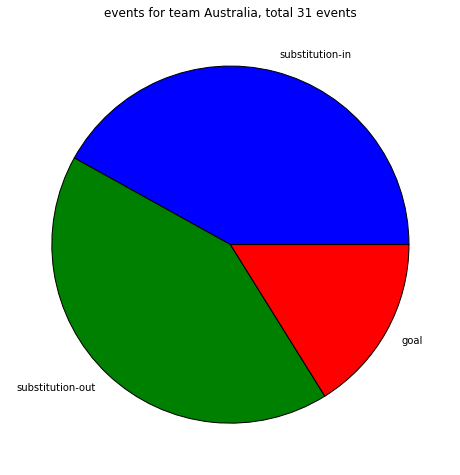

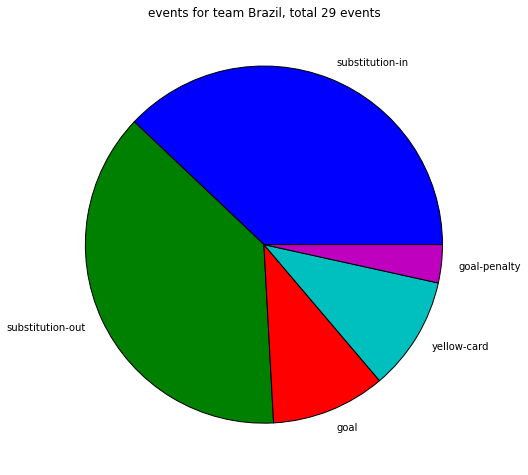

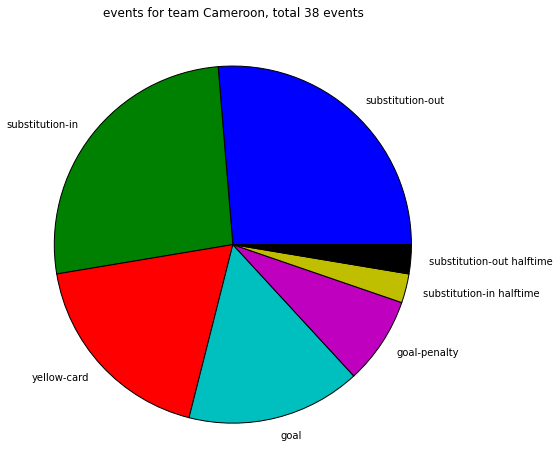

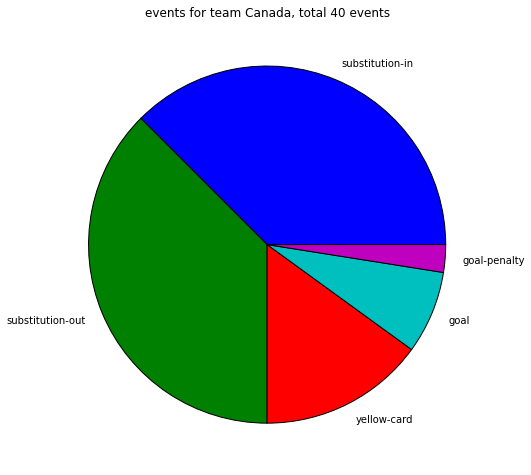

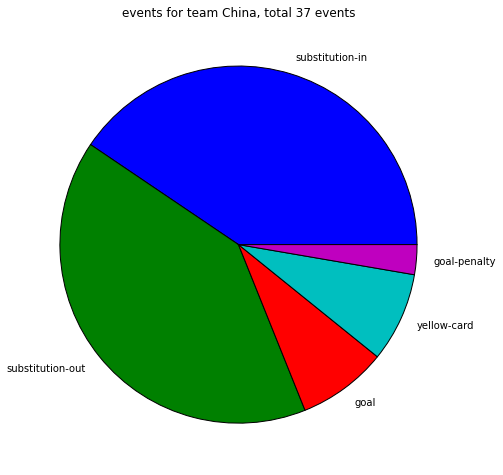

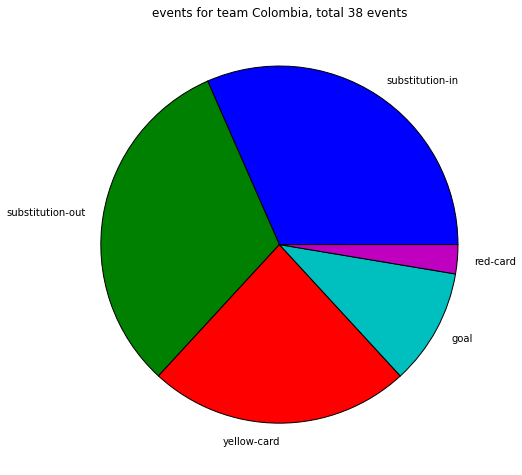

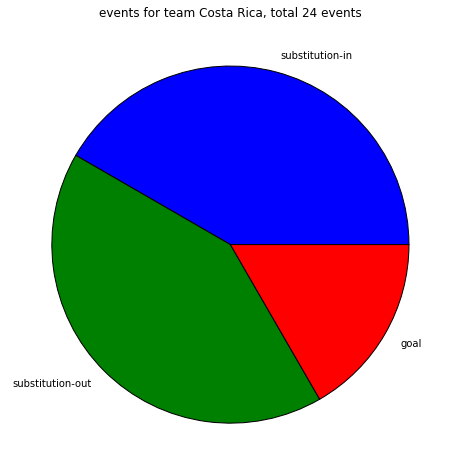

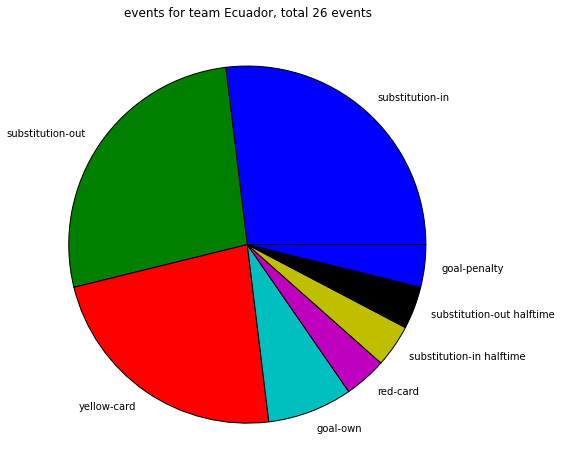

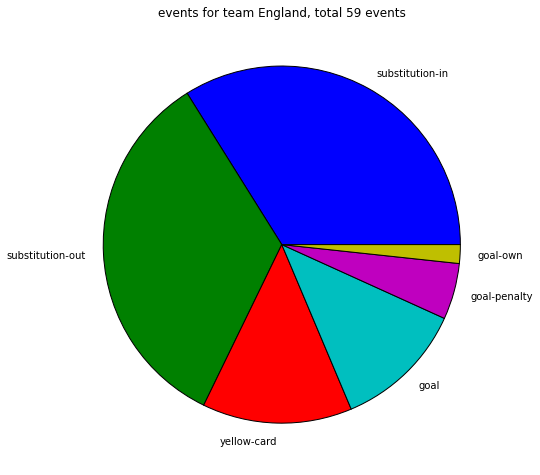

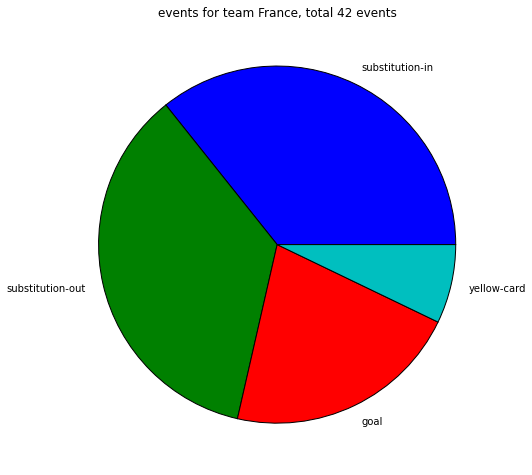

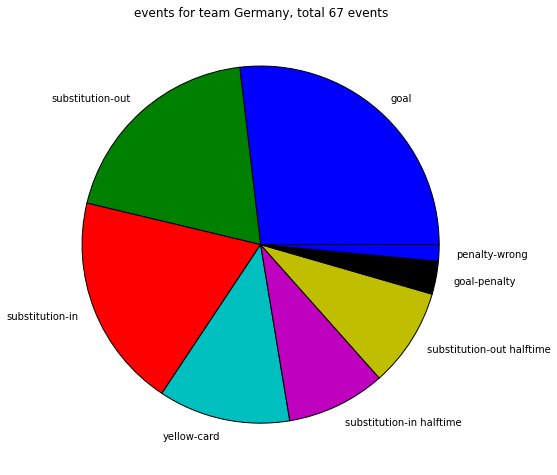

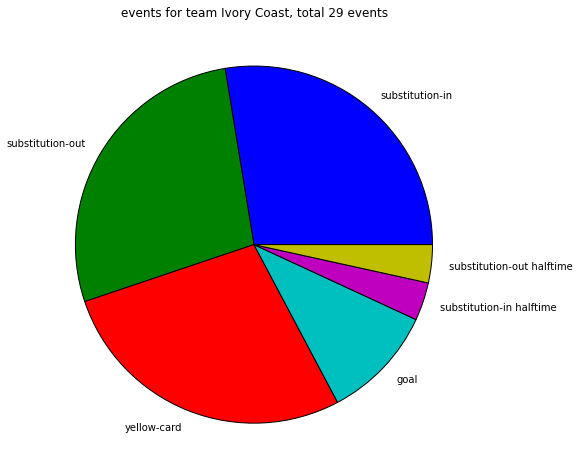

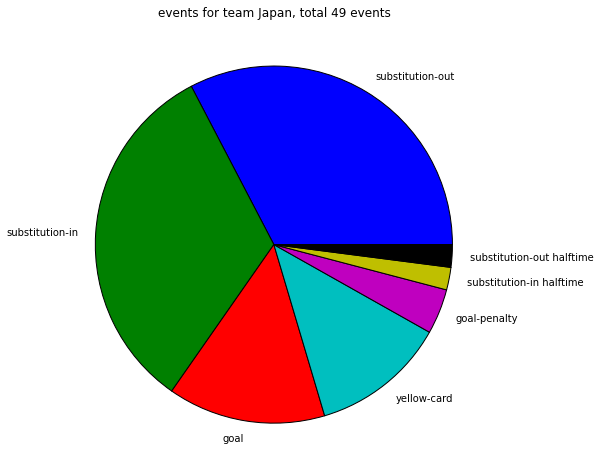

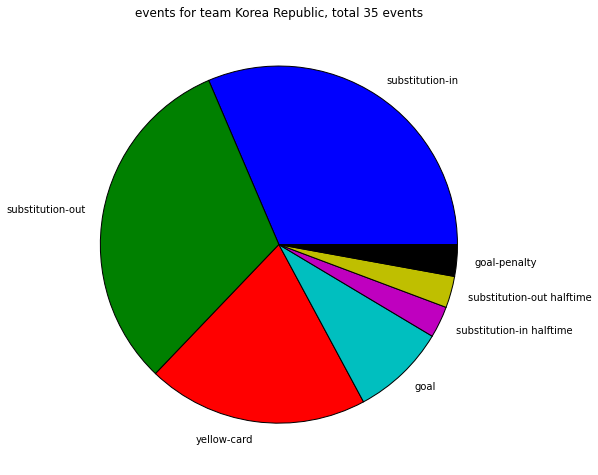

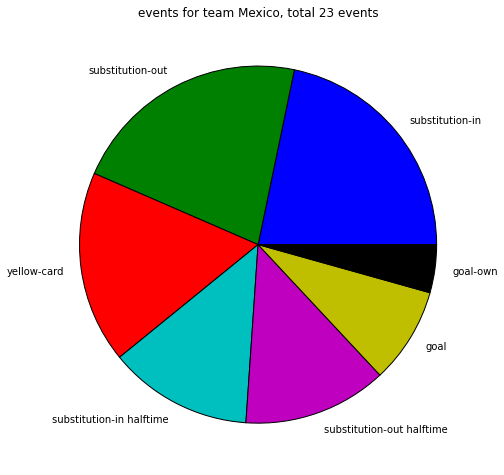

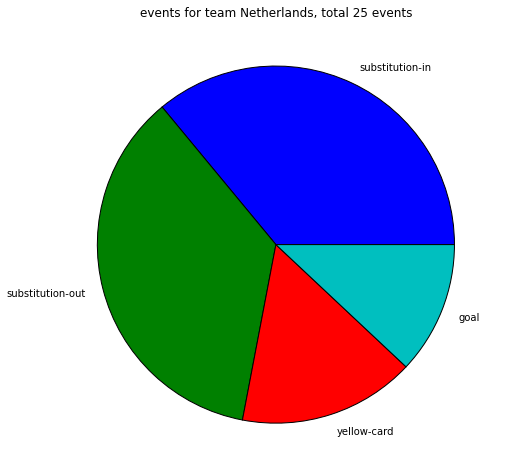

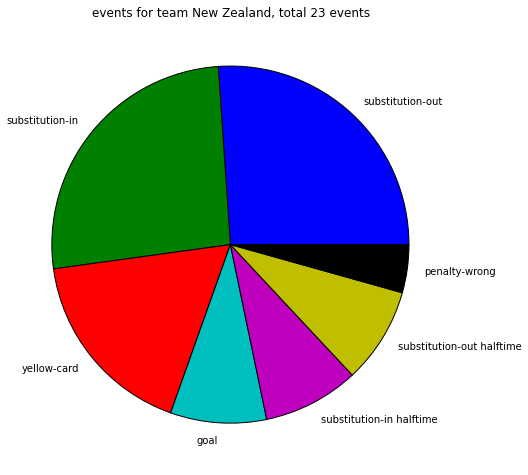

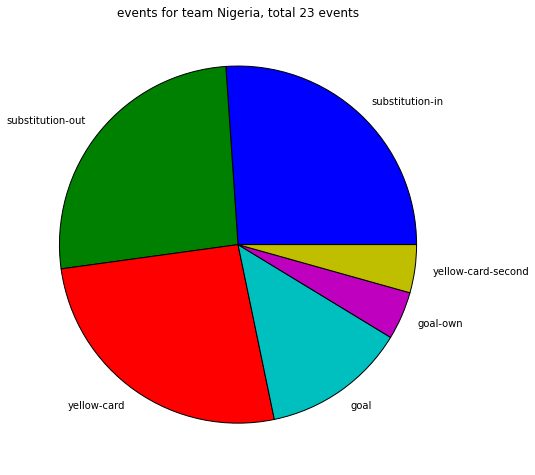

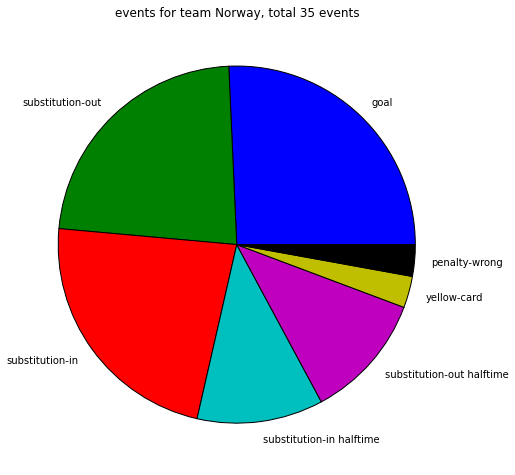

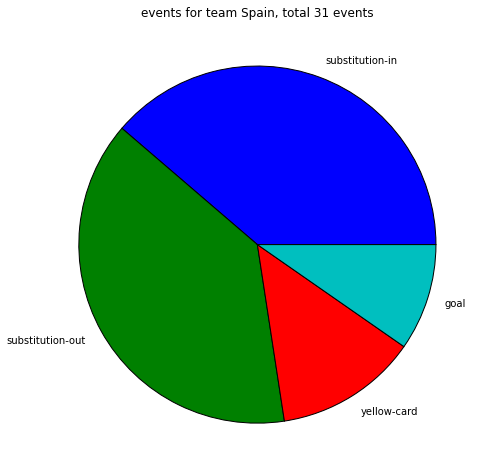

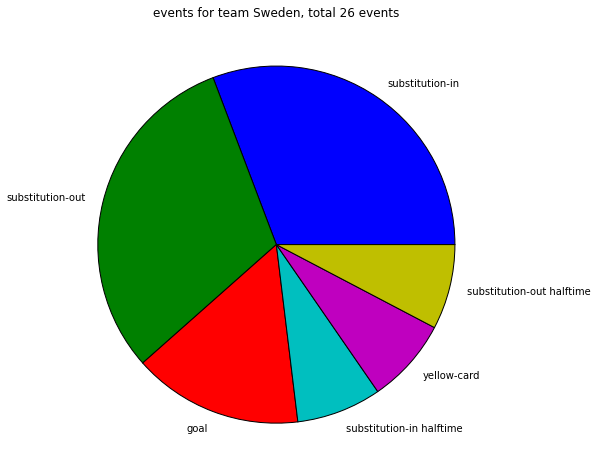

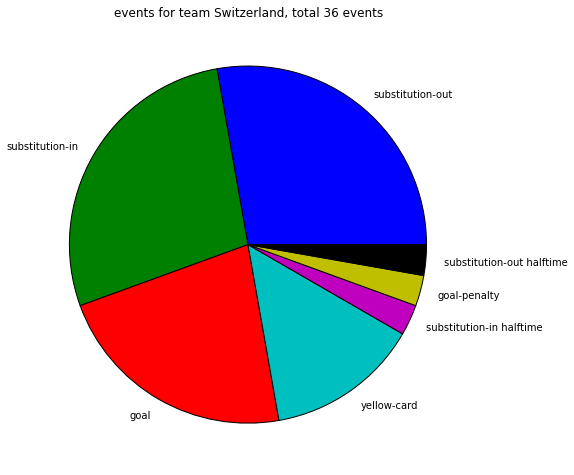

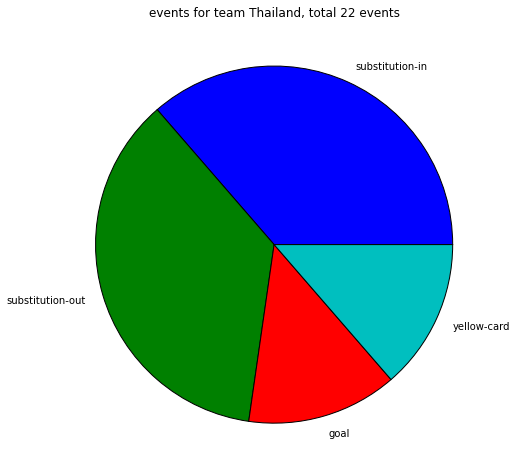

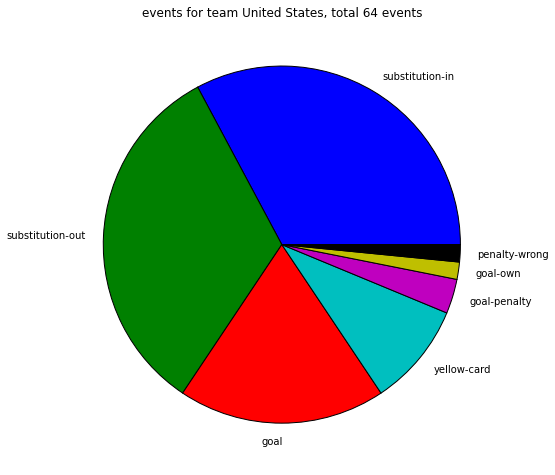

In [69]:
team_gpby = events_by_team.groupby('team')
%time
for i in team_gpby:
    #i is a tuple, which look like this
    # (0, df of events of the first team), (1, df of events of the second team) etc
    j = i[1] # j now is the 
    team_name = i[0]
    j =j.reset_index()
    j = j.set_index('type_of_event')
    
    j['count'].plot(kind='pie',figsize = (8,8)) #using j.count confuse pandas, thinking I want to count it
    plt.ylabel('')
    plt.title('events for team '+team_name +', total '+str(j['count'].sum())+' events')
    plt.show()


In [337]:
# lets loo at how each team made it in the games
unpacked_events.groupby('team').match.max().order()

team
New Zealand       26
Thailand          27
Ivory Coast       28
Ecuador           29
Nigeria           31
Costa Rica        33
Spain             34
Mexico            35
Cameroon          37
Colombia          38
Sweden            39
Korea Republic    40
Brazil            41
Netherlands       42
Norway            43
Switzerland       44
China             45
France            46
Australia         47
Canada            48
Germany           51
England           51
Japan             52
United States     52
Name: match, dtype: int64

#### Turn out the Chinese Women team made it quite far, I was surprised by that.

####Next let check out how many goals each team get

In [340]:
unpacked_events[unpacked_events['type_of_event'].str.contains('goal')].groupby('team').time.count().order()

team
New Zealand        2
Ivory Coast        3
Ecuador            3
Spain              3
Thailand           3
Netherlands        3
Mexico             3
Brazil             4
Sweden             4
Canada             4
China              4
Colombia           4
Costa Rica         4
Nigeria            4
Korea Republic     4
Australia          5
France             9
Norway             9
Cameroon           9
Switzerland        9
Japan              9
England           11
United States     15
Germany           20
Name: time, dtype: int64

In [343]:
unpacked_events[unpacked_events['type_of_event'].str.contains('goal')].groupby('team').time.count().sum()

148

In [72]:
from __future__ import division
print "So there were 148 goals in 52 games, which average to %.3f goal a game." %(148/52)
print "Not that boring game!"

So there were 148 goals in 52 games, which average to 2.846 goal a game.
Not that boring game!


In [73]:
total_goal = unpacked_events[unpacked_events['type_of_event'].str.contains('goal')].groupby('team').time.count().order()
max_match  = unpacked_events.groupby('team').match.max().order()

In [75]:
print max_match, total_goal

team
New Zealand       26
Thailand          27
Ivory Coast       28
Ecuador           29
Nigeria           31
Costa Rica        33
Spain             34
Mexico            35
Cameroon          37
Colombia          38
Sweden            39
Korea Republic    40
Brazil            41
Netherlands       42
Norway            43
Switzerland       44
China             45
France            46
Australia         47
Canada            48
Germany           51
England           51
Japan             52
United States     52
Name: match, dtype: int64 team
New Zealand        2
Ivory Coast        3
Ecuador            3
Spain              3
Thailand           3
Netherlands        3
Mexico             3
Brazil             4
Sweden             4
Canada             4
China              4
Colombia           4
Costa Rica         4
Nigeria            4
Korea Republic     4
Australia          5
France             9
Norway             9
Cameroon           9
Switzerland        9
Japan              9
England           1

In [78]:
goal_max_match  = pd.concat([total_goal, max_match], axis =1) 
#lets put the two series next to each other and make a df

In [79]:
goal_max_match.columns = ['goals','match'] #change the names of column

In [84]:
goal_max_match  = goal_max_match.reset_index(drop = False)
goal_max_match

,match,index,goals
0,26,New Zealand,2
1,27,Thailand,3
2,28,Ivory Coast,3
3,29,Ecuador,3
4,31,Nigeria,4
5,33,Costa Rica,4
6,34,Spain,3
7,35,Mexico,3
8,37,Cameroon,9
9,38,Colombia,4


In [85]:
goal_max_match = goal_max_match.set_index('match')

In [86]:
goal_max_match = goal_max_match.sort_index()
goal_max_match

,index,goals
match,,
26,New Zealand,2
27,Thailand,3
28,Ivory Coast,3
29,Ecuador,3
31,Nigeria,4
33,Costa Rica,4
34,Spain,3
35,Mexico,3
37,Cameroon,9


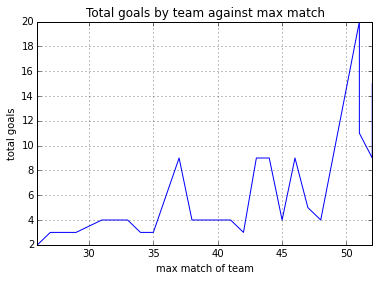

In [87]:
goal_max_match.goals.plot()
plt.ylabel('total goals')
plt.xlabel('max match of team')
plt.title('Total goals by team against max match')